In [1]:
from MultiRouteViz import *
import numpy as np
from scipy.optimize import curve_fit
import math

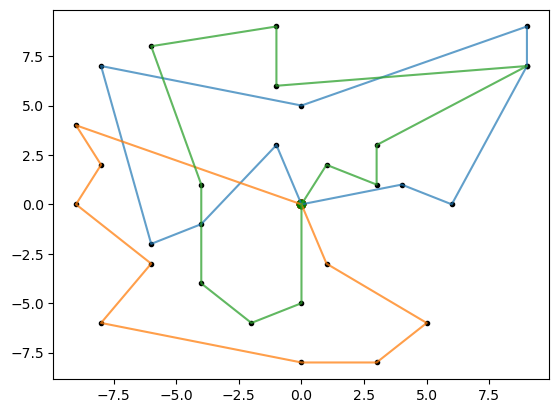

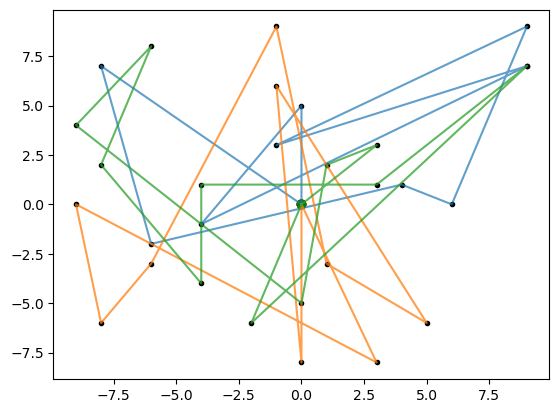

In [2]:

plt.figure()
display_route('saved_routes/MultiRouteOpt.txt')

plt.figure()
display_route('saved_routes/MultiRouteUnOpt.txt')

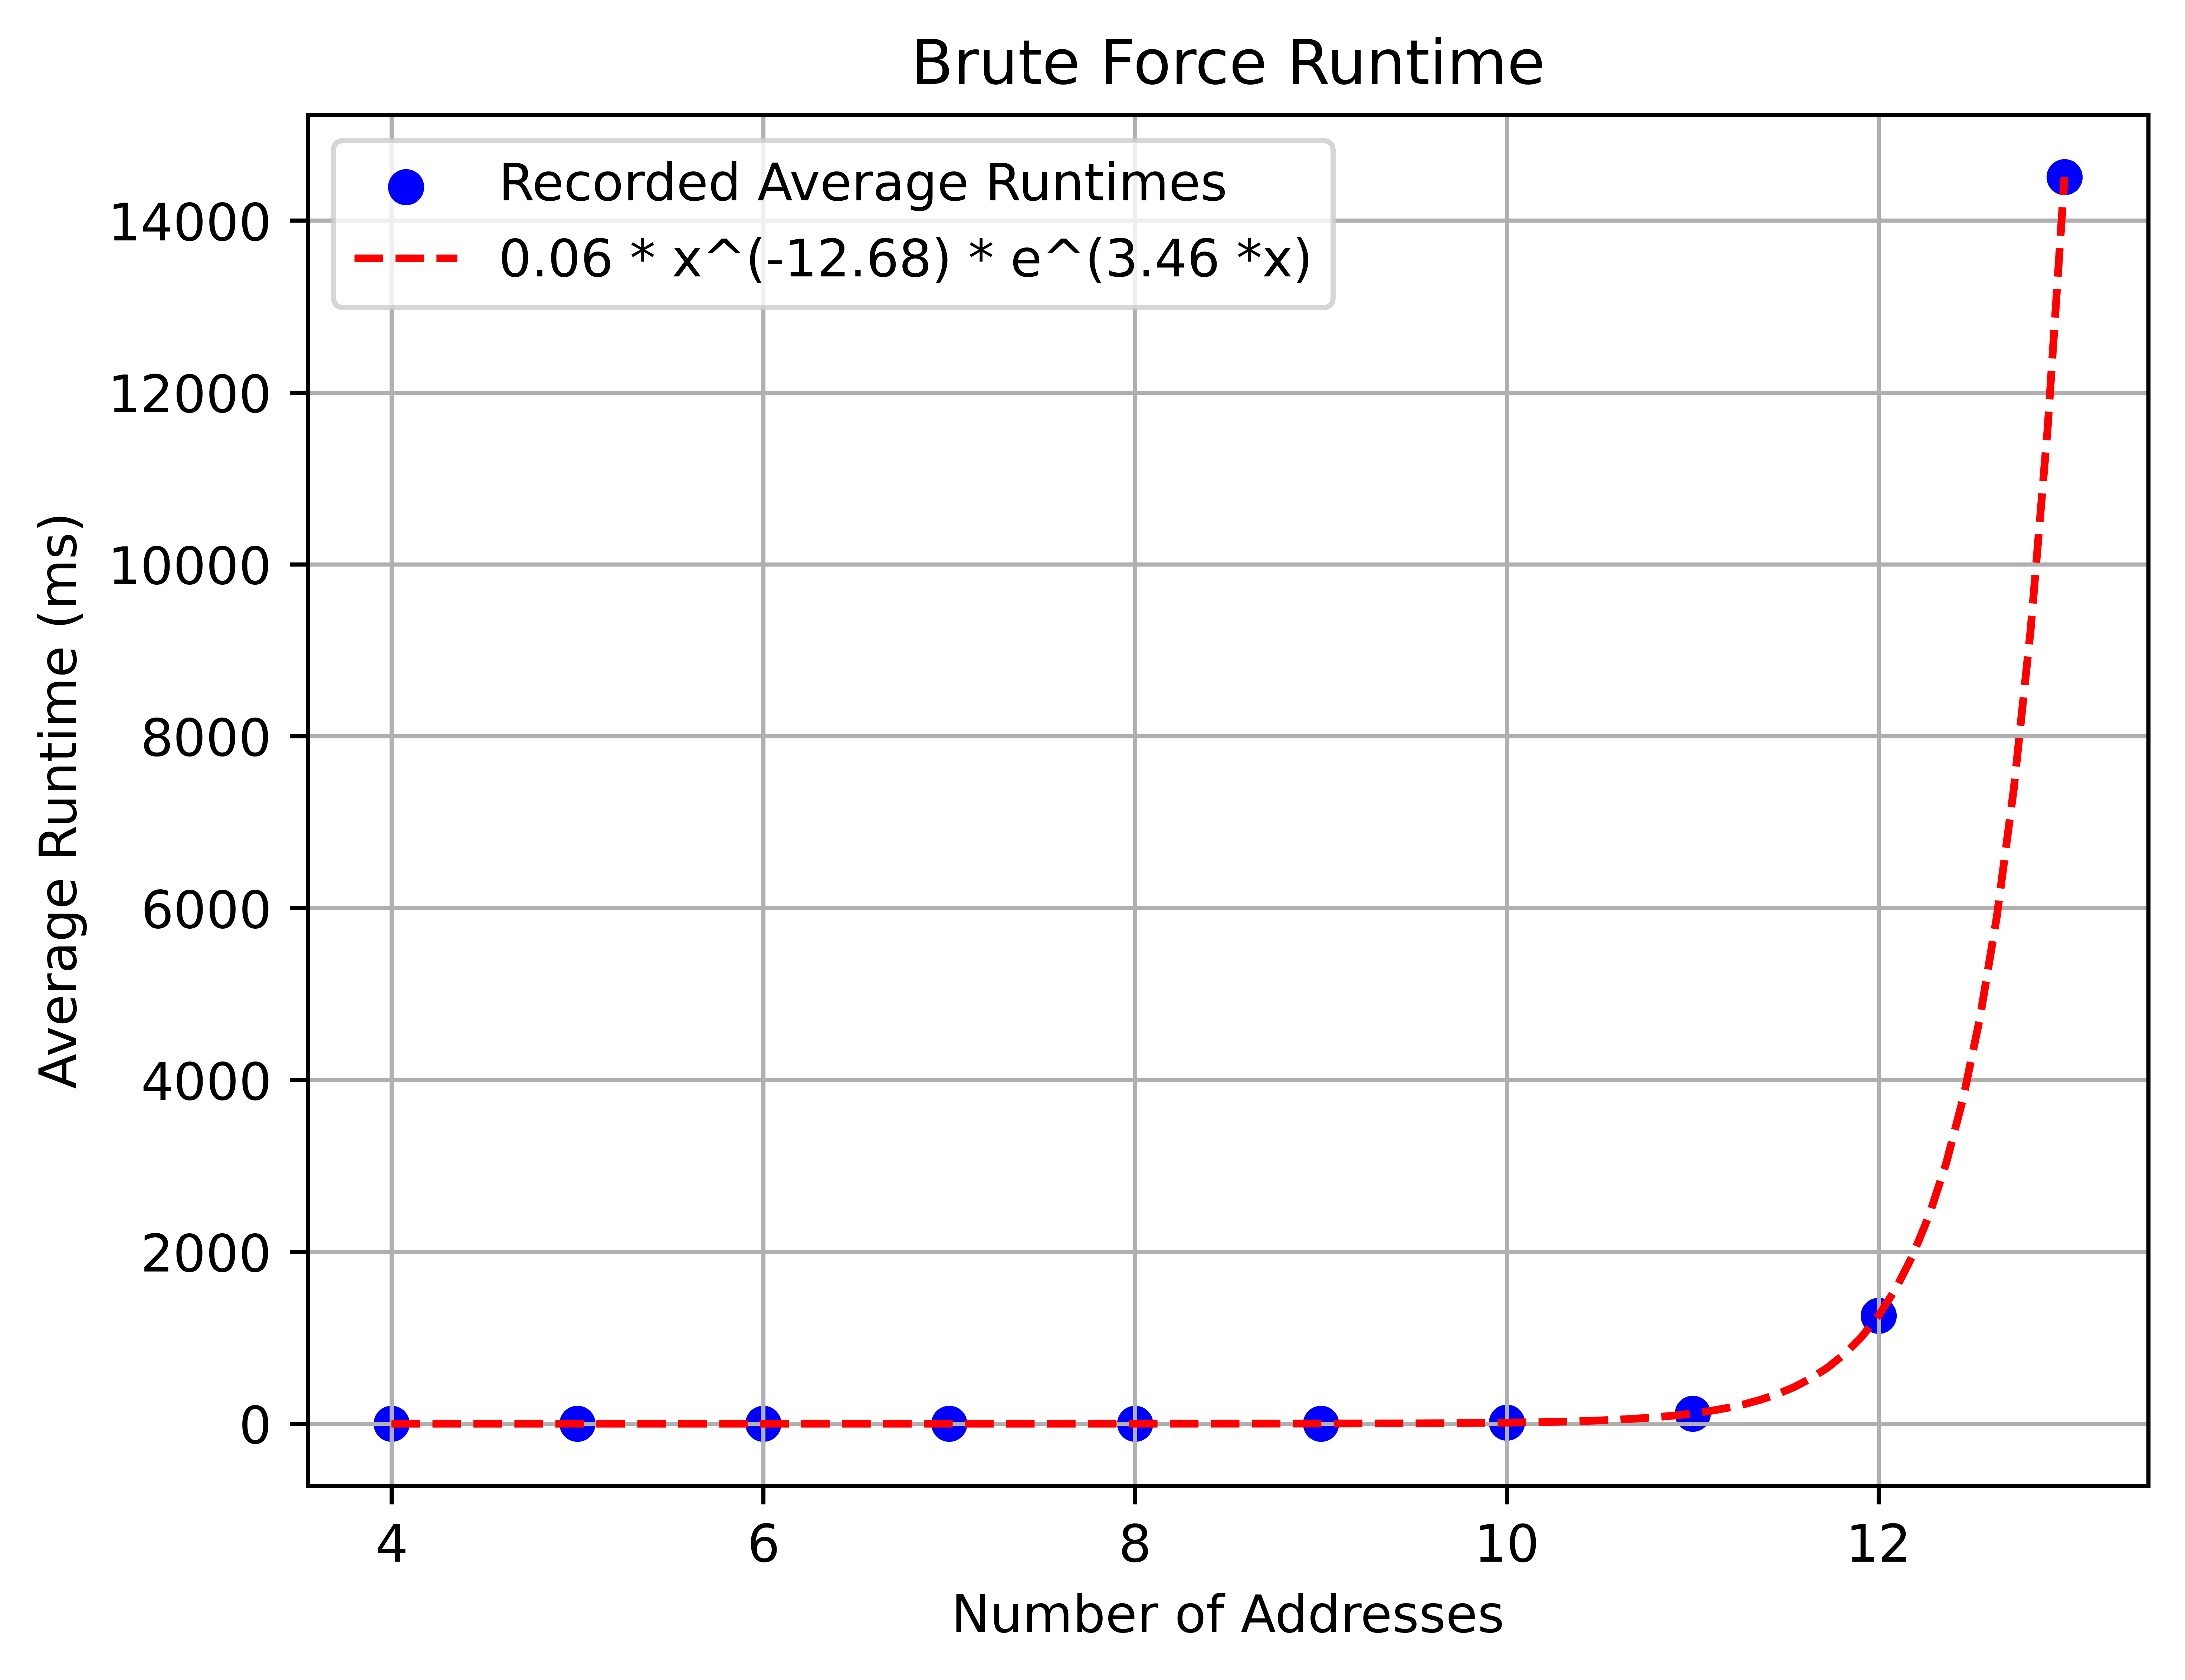

In [3]:
# Custom function for the factorial-like curve
def factorial_like_fit(x, a, b, c):
    return a * x ** (b - 1) * np.exp(-c * x)

plt.figure(dpi=1000)
with open("Figures and Data/total_search_runtime.txt", 'r') as file:
    data = [line.strip().split(', ') for line in file]

# Separate the data into x and y lists
x_values, y_values = zip(*map(lambda d: (int(d[0]), int(d[1])), data))

# Divide the y-axis values by 1000
y_values_scaled = [value / 1000 for value in y_values]

# Fit the custom factorial-like function to the data
params, covariance = curve_fit(factorial_like_fit, x_values, y_values_scaled, maxfev=100000, p0=[1,2,.001])

# Generate y values for the fitted factorial-like curve
y_fit = factorial_like_fit(np.linspace(4,13,100), *params)
#print(y_fit)

# Plot the data and the factorial-like fit
plt.scatter(x_values, y_values_scaled, marker='o', color='b', label='Recorded Average Runtimes')
plt.plot(np.linspace(4,13,100), y_fit, linestyle='--', color='r', label=f'{params[0]:.2f} * x^({params[1]-1:.2f}) * e^({-params[2]:.2f} *x)')



# Plot the data
#plt.plot(x_values, y_values_scaled, marker='o', linestyle='-', color='b')
plt.legend()
plt.title('Brute Force Runtime')
plt.xlabel('Number of Addresses')
plt.ylabel('Average Runtime (ms)')
plt.grid(True)
plt.show()

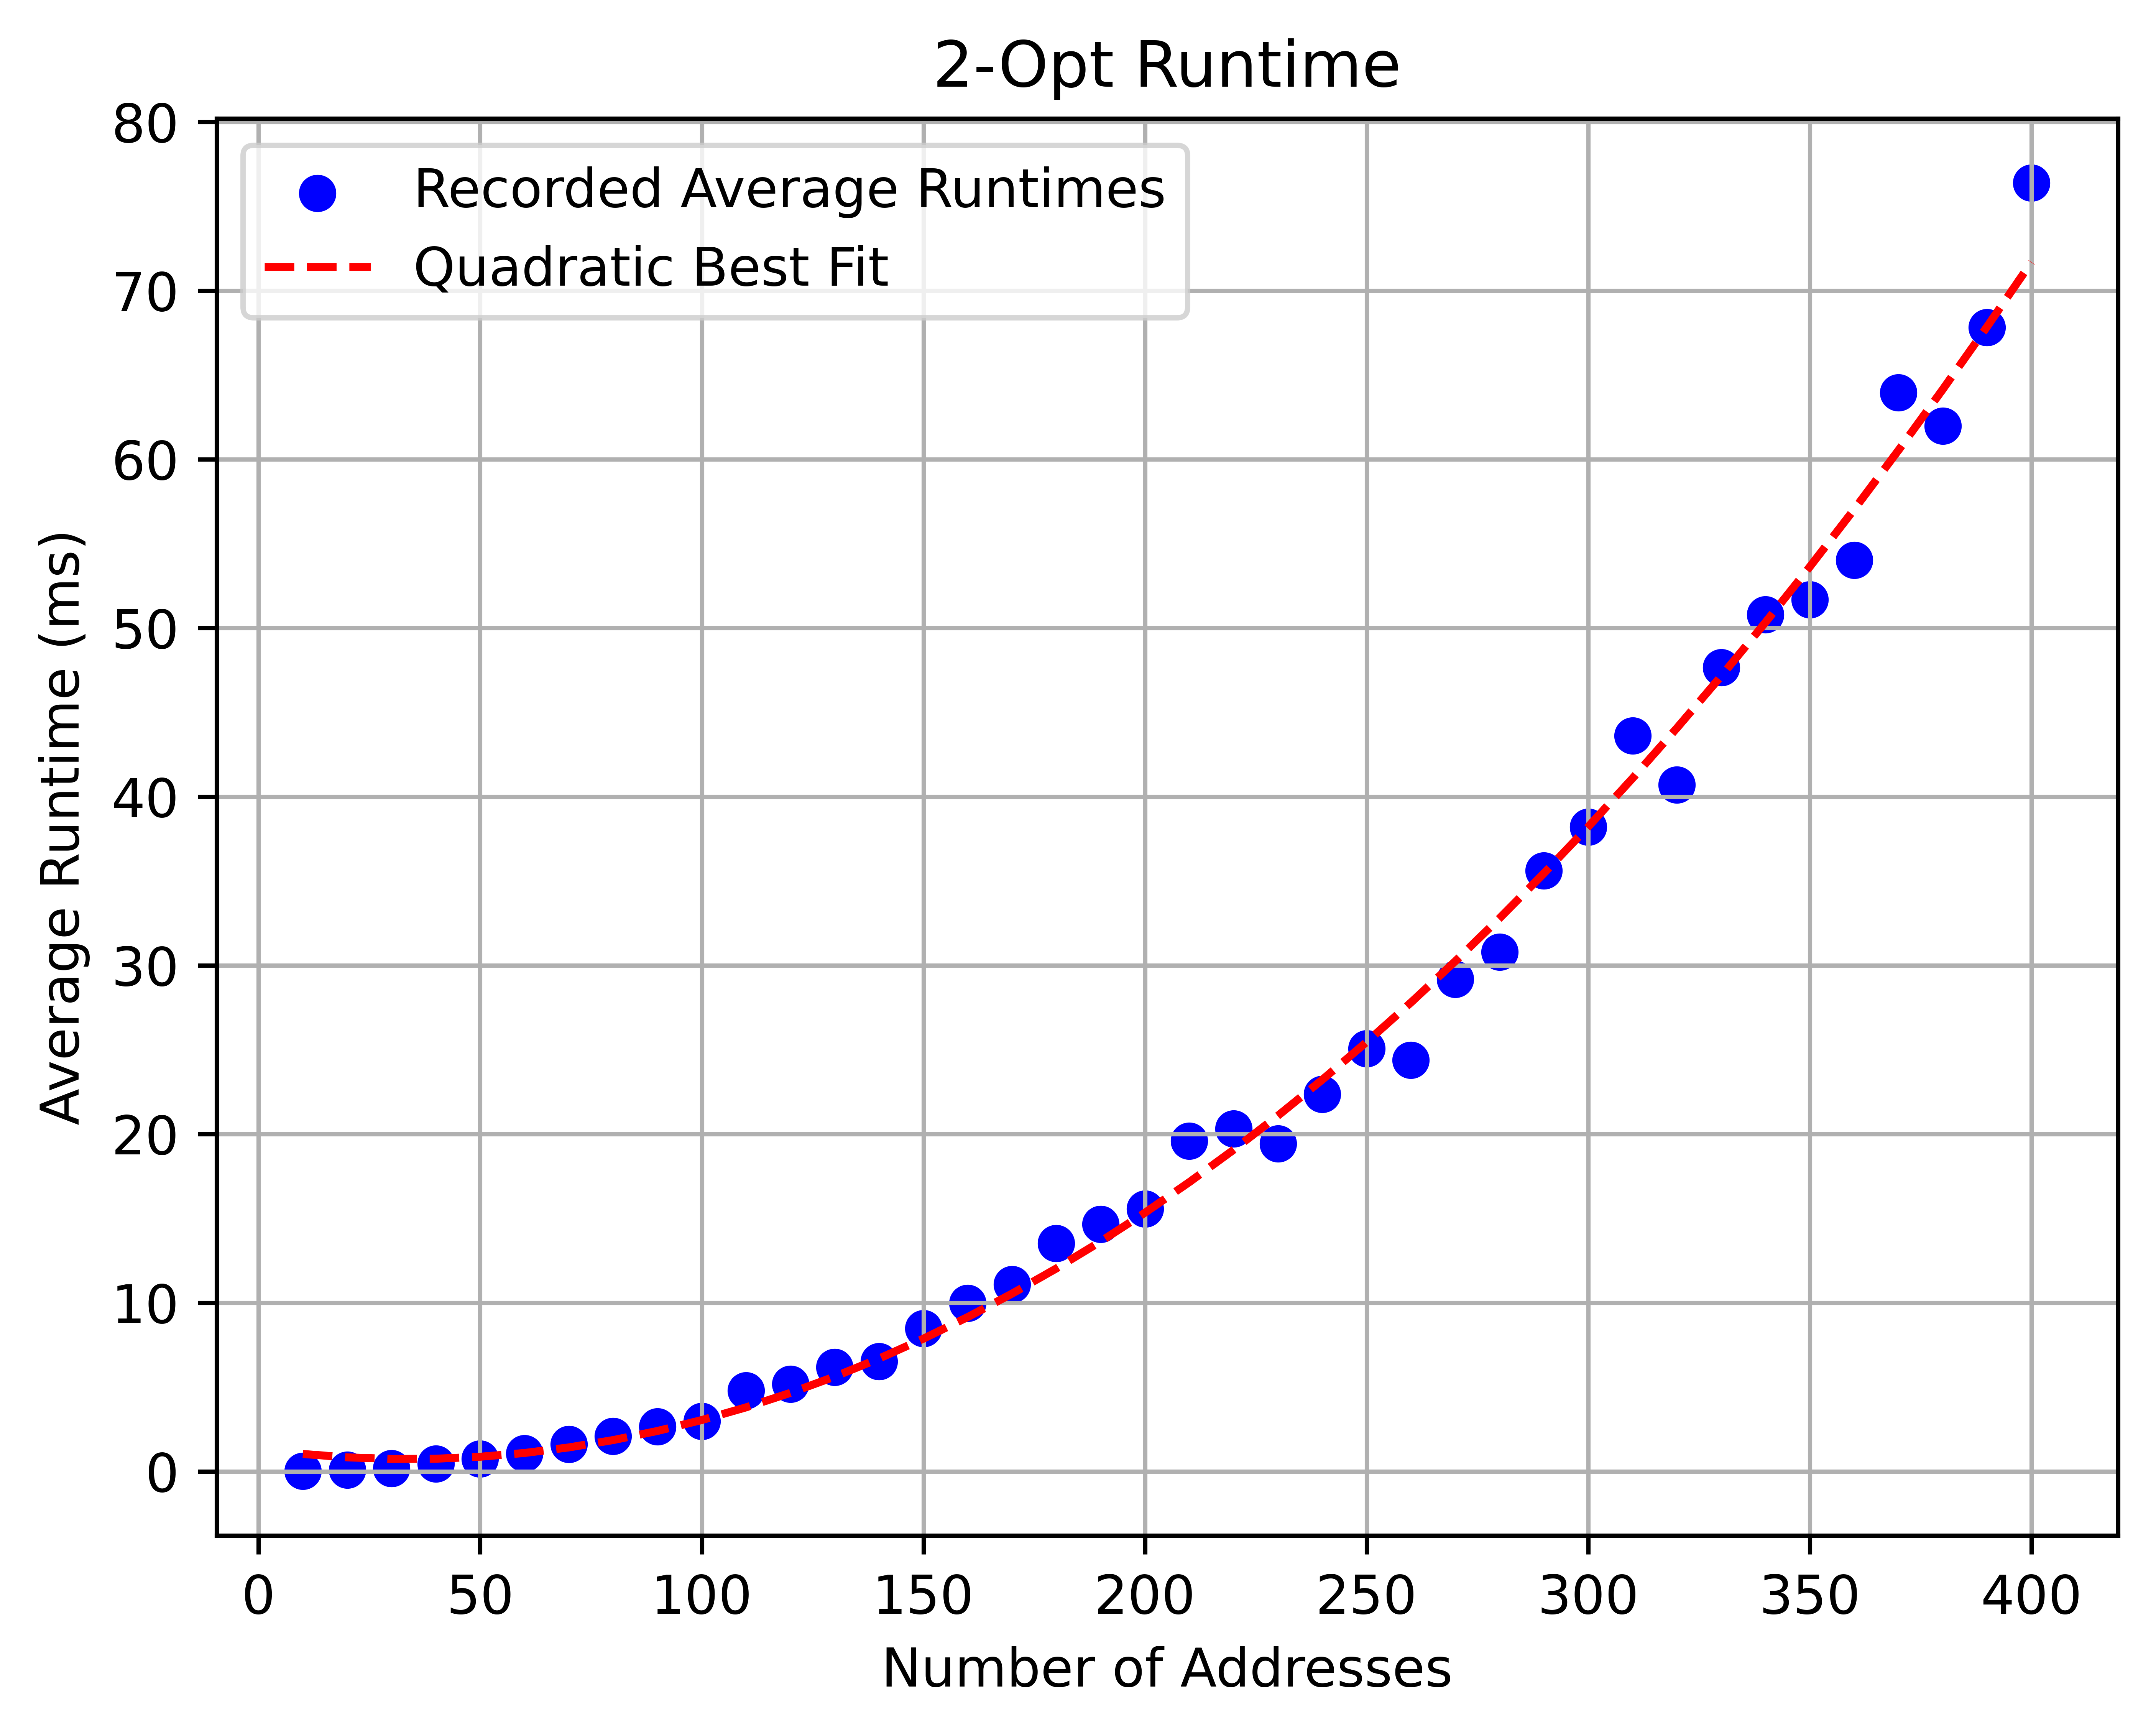

In [4]:
plt.figure(dpi=1000)

with open("Figures and Data/two_opt_runtime.txt", 'r') as file:
    data = [line.strip().split(', ') for line in file]

# Separate the data into x and y lists
x_values, y_values = zip(*map(lambda d: (int(d[0]), int(d[1])), data))

# Divide the y-axis values by 1000
y_values_scaled = [value / 1000 for value in y_values]

# Fit a quadratic polynomial to the data
coefficients = np.polyfit(x_values, y_values_scaled, 2)
quadratic_fit = np.poly1d(coefficients)

# Generate y values for the fitted quadratic polynomial
y_fit = quadratic_fit(x_values)

# Plot the data and the quadratic fit
plt.scatter(x_values, y_values_scaled, marker='o', linestyle='-', color='b', label='Recorded Average Runtimes')
plt.plot(x_values, y_fit, linestyle='--', color='r', label=f'Quadratic Best Fit')


# Plot the data
plt.legend()
plt.title('2-Opt Runtime')
plt.xlabel('Number of Addresses')
plt.ylabel('Average Runtime (ms)')
plt.grid(True)
plt.show()

([], [])

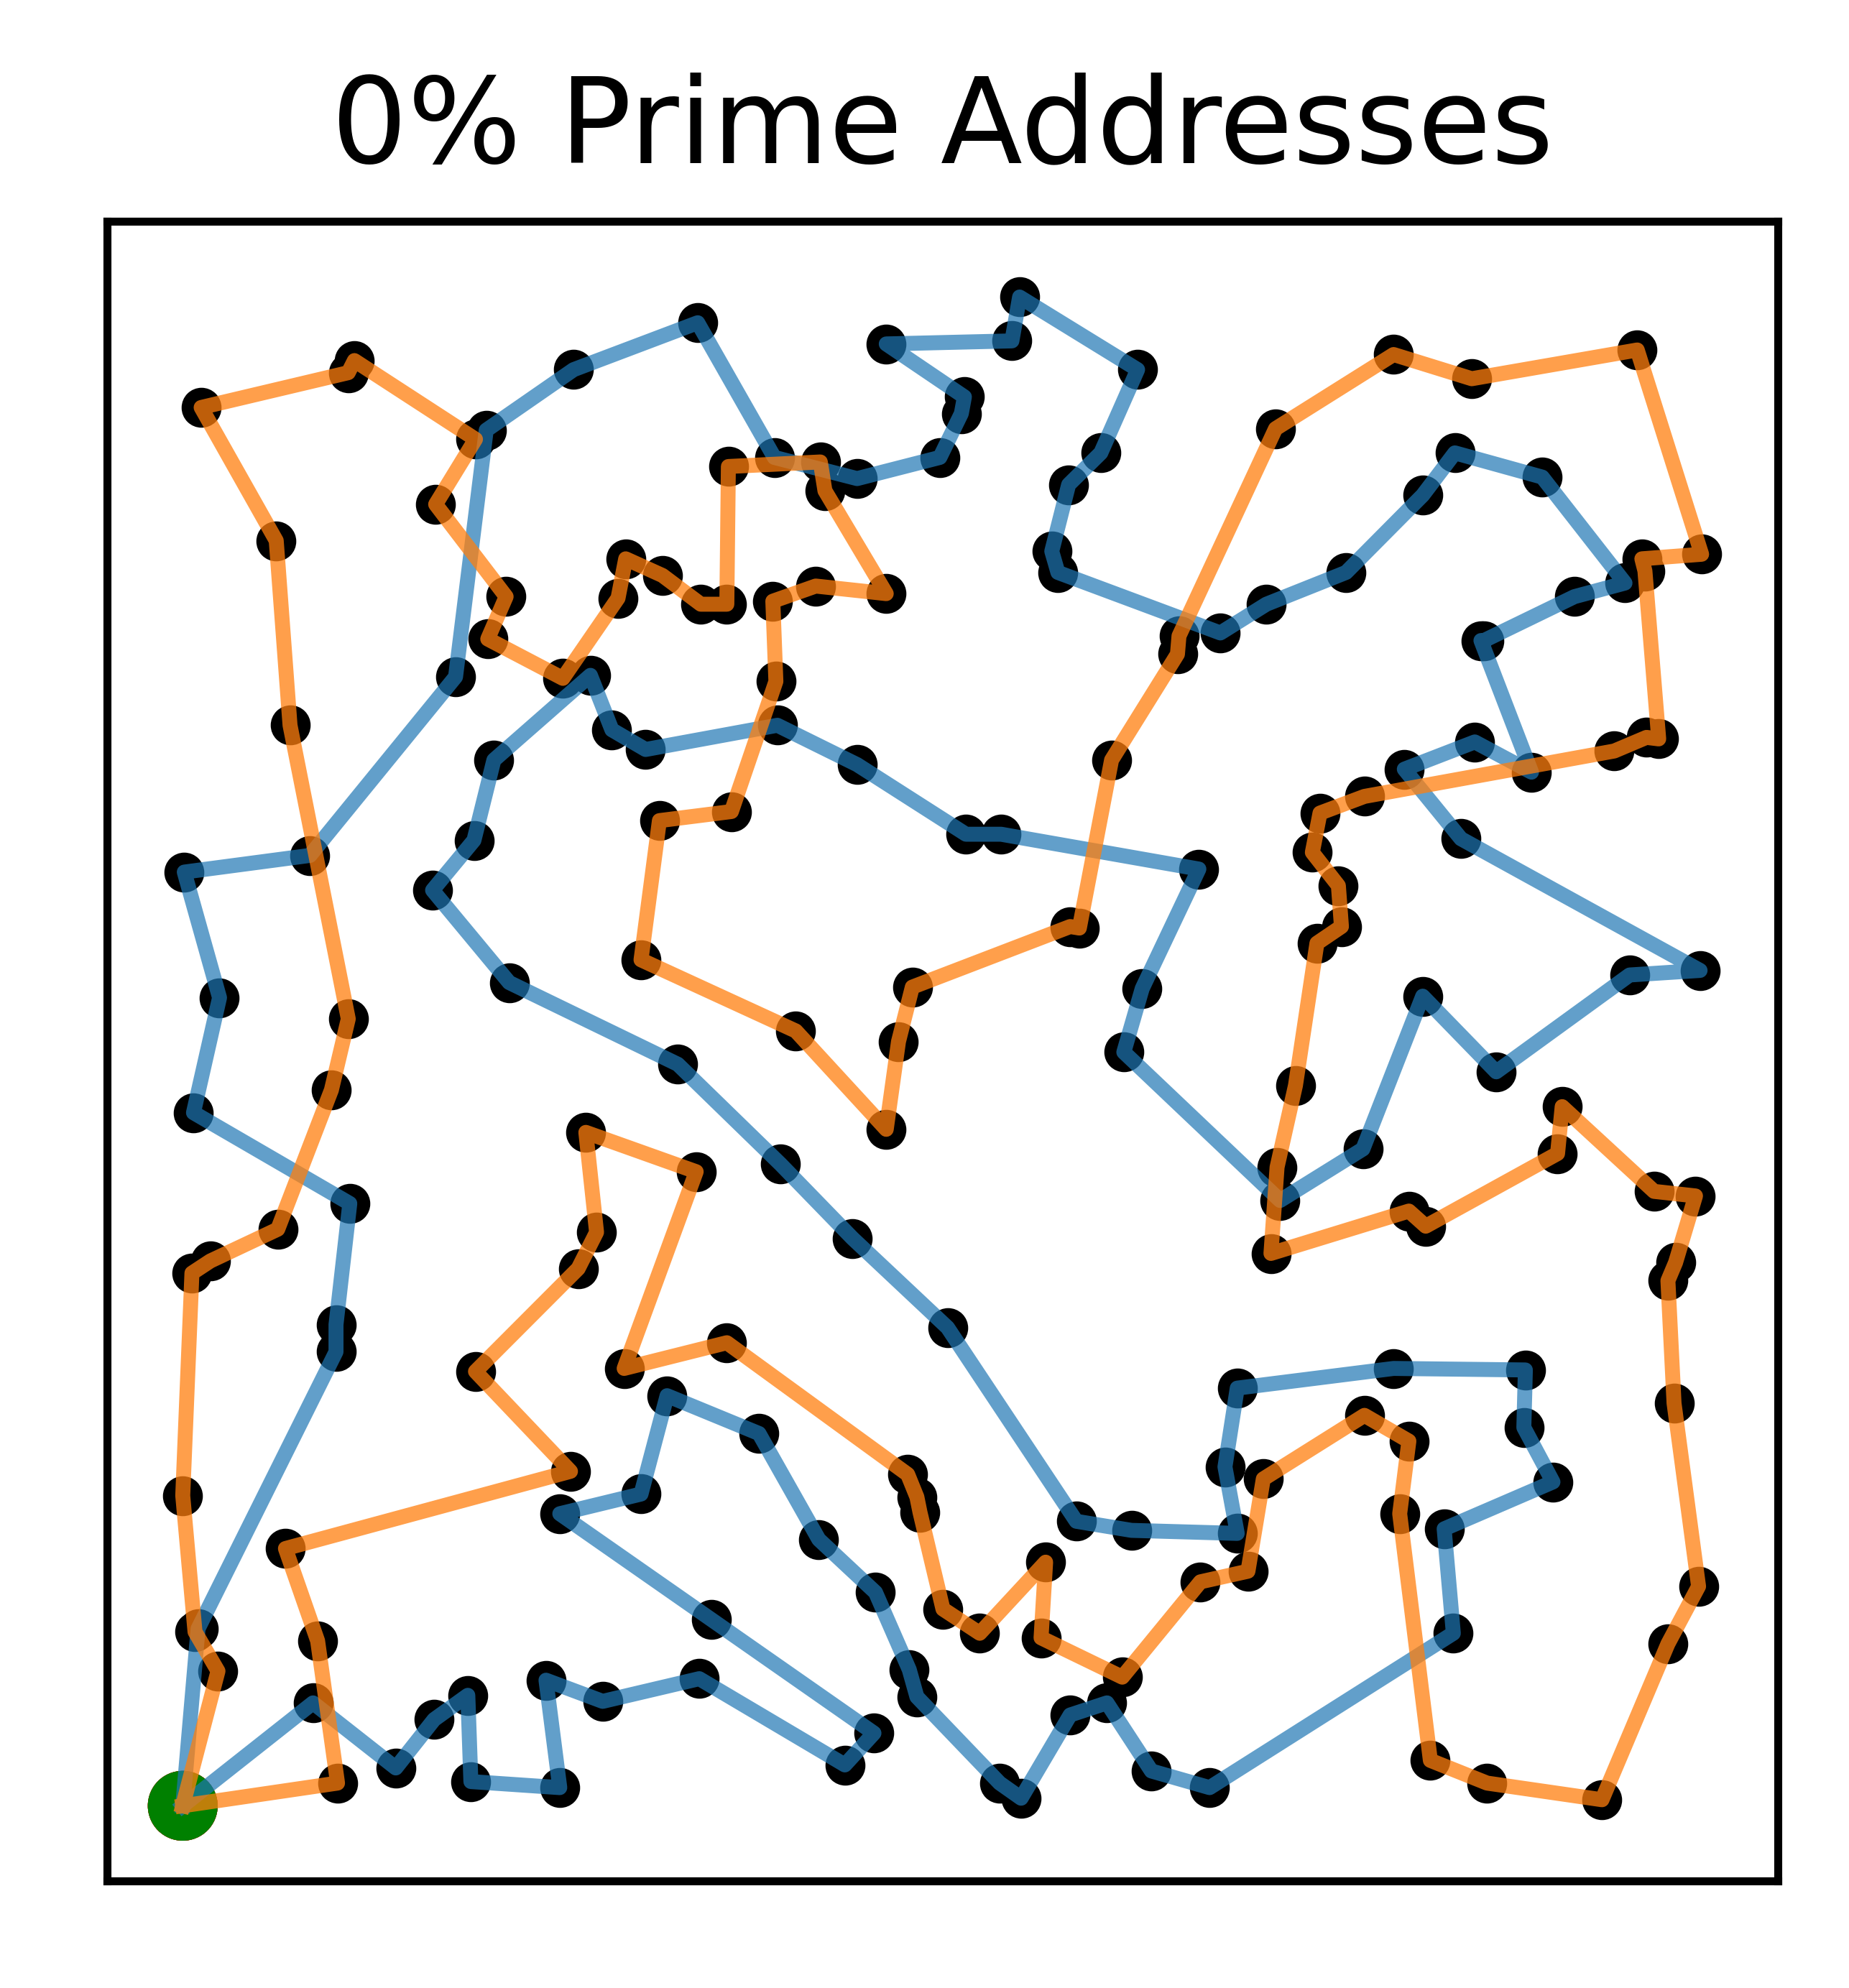

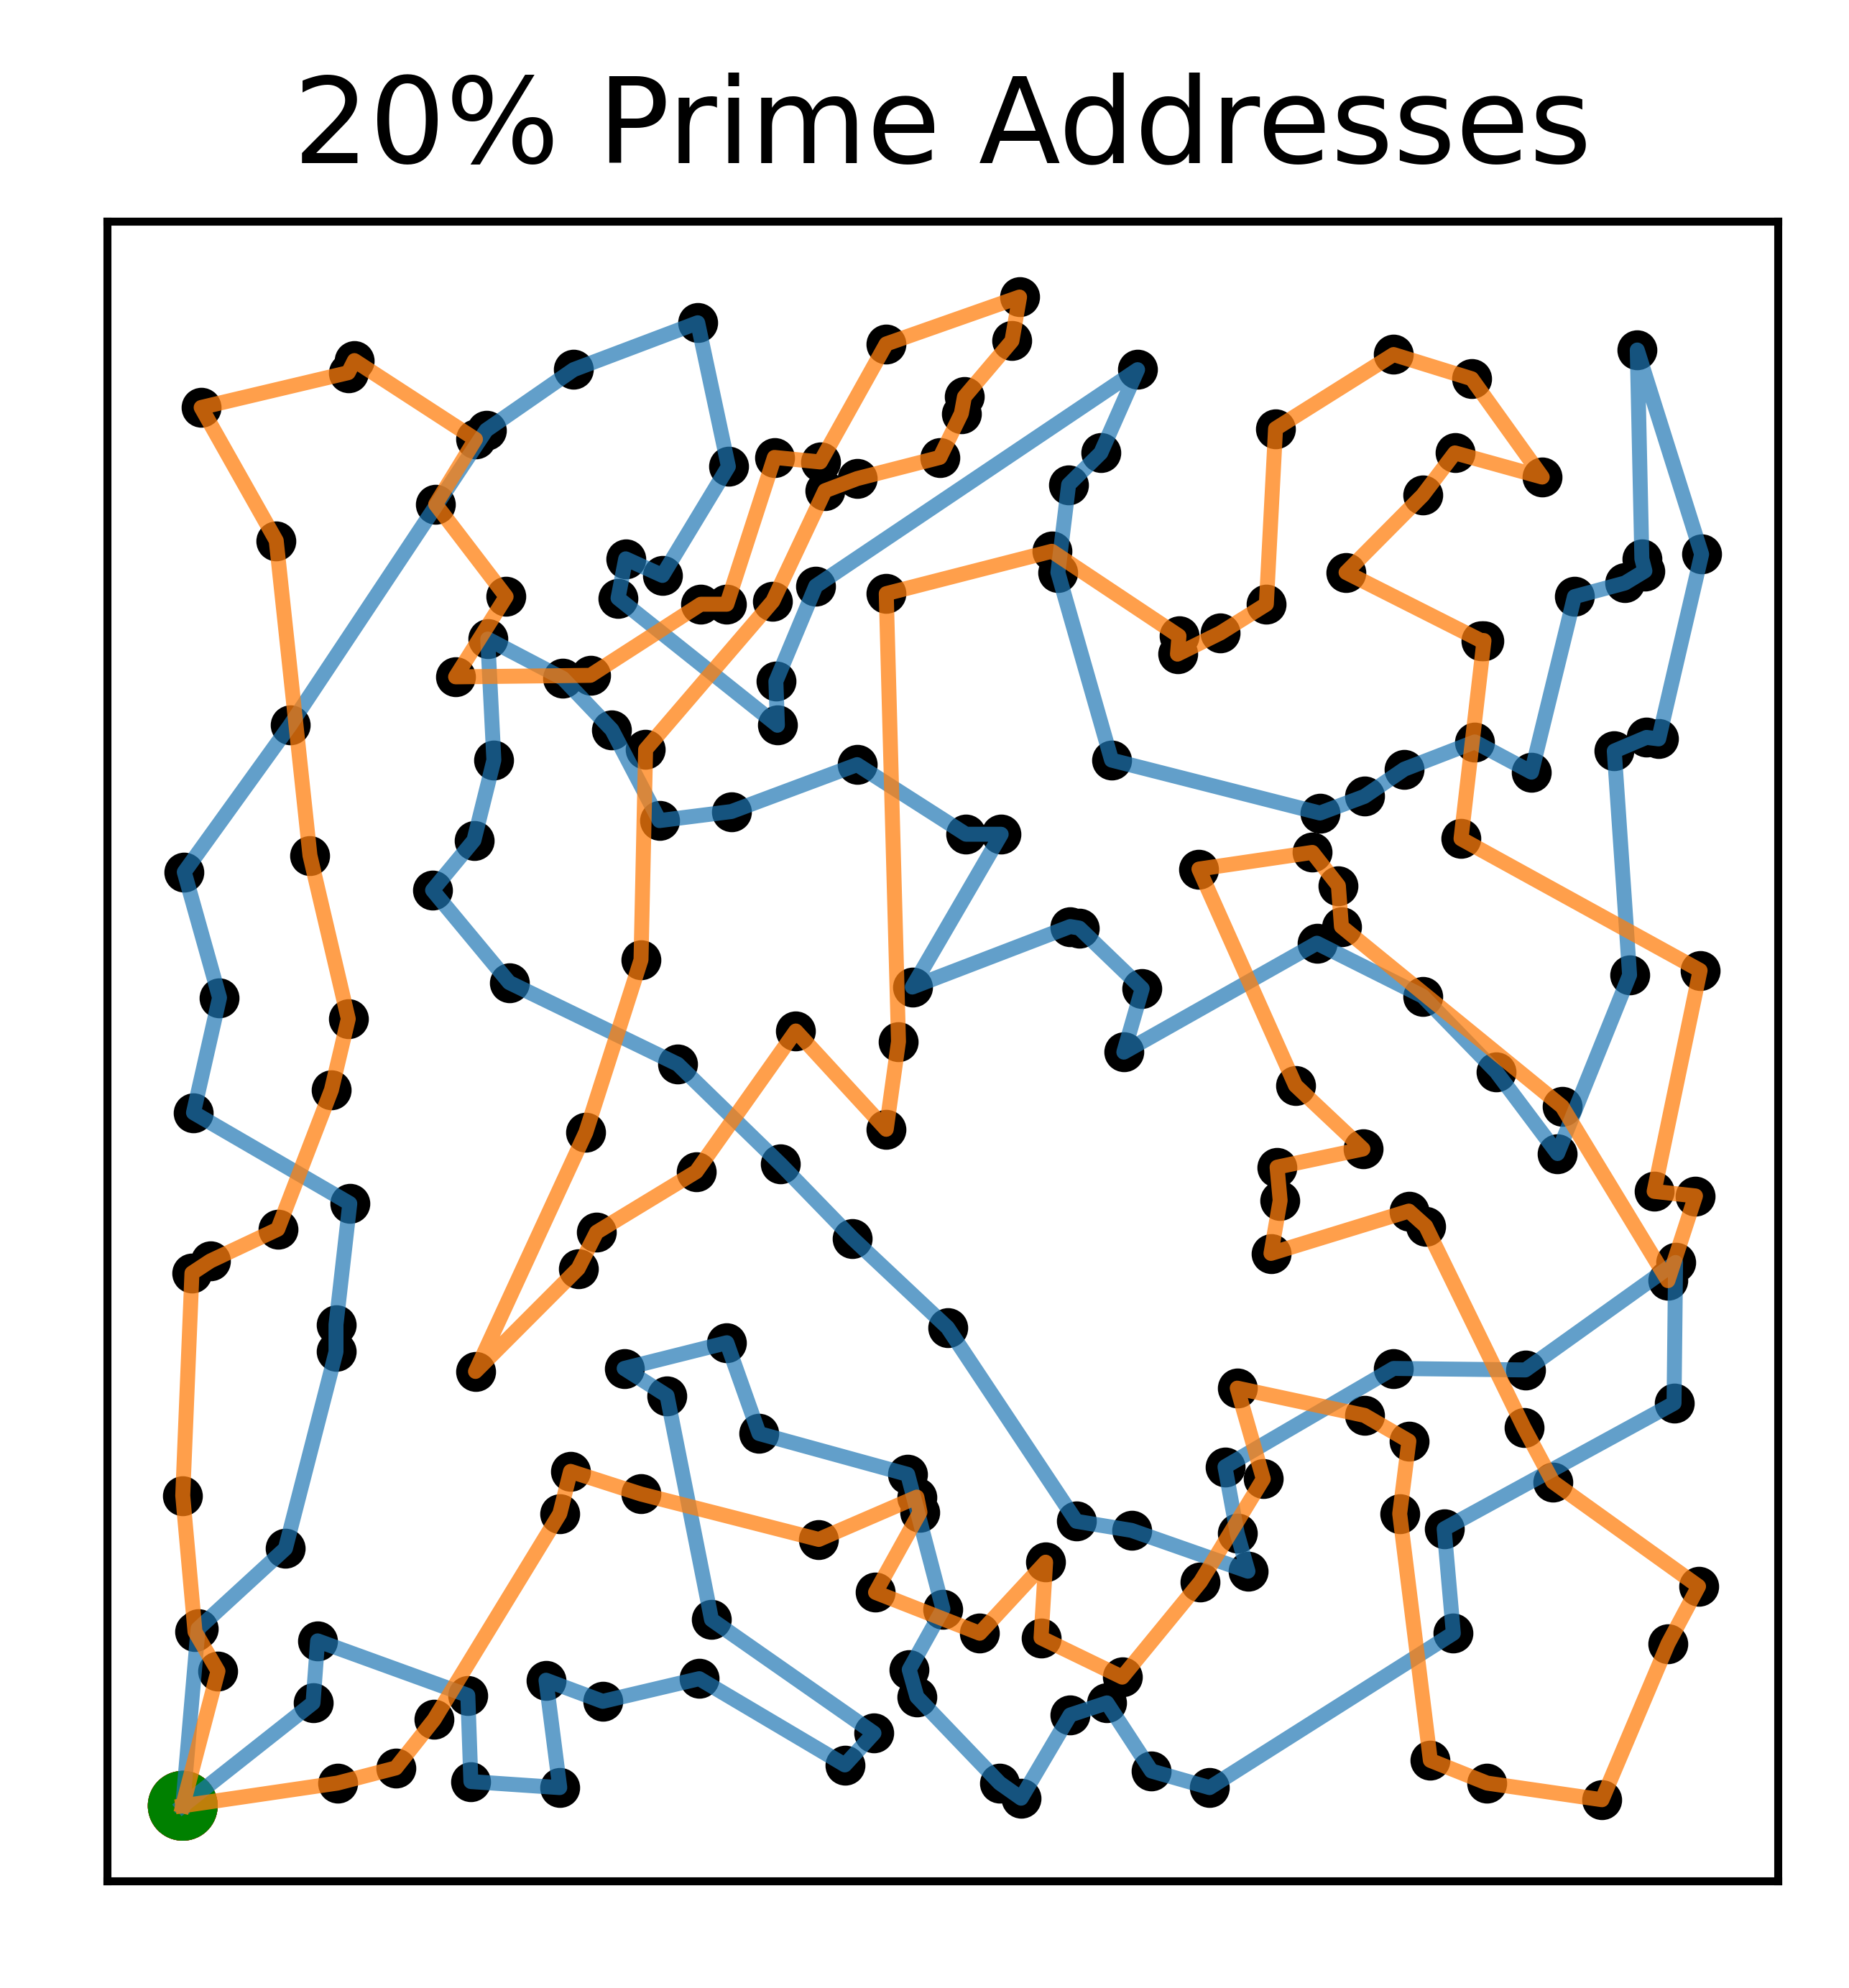

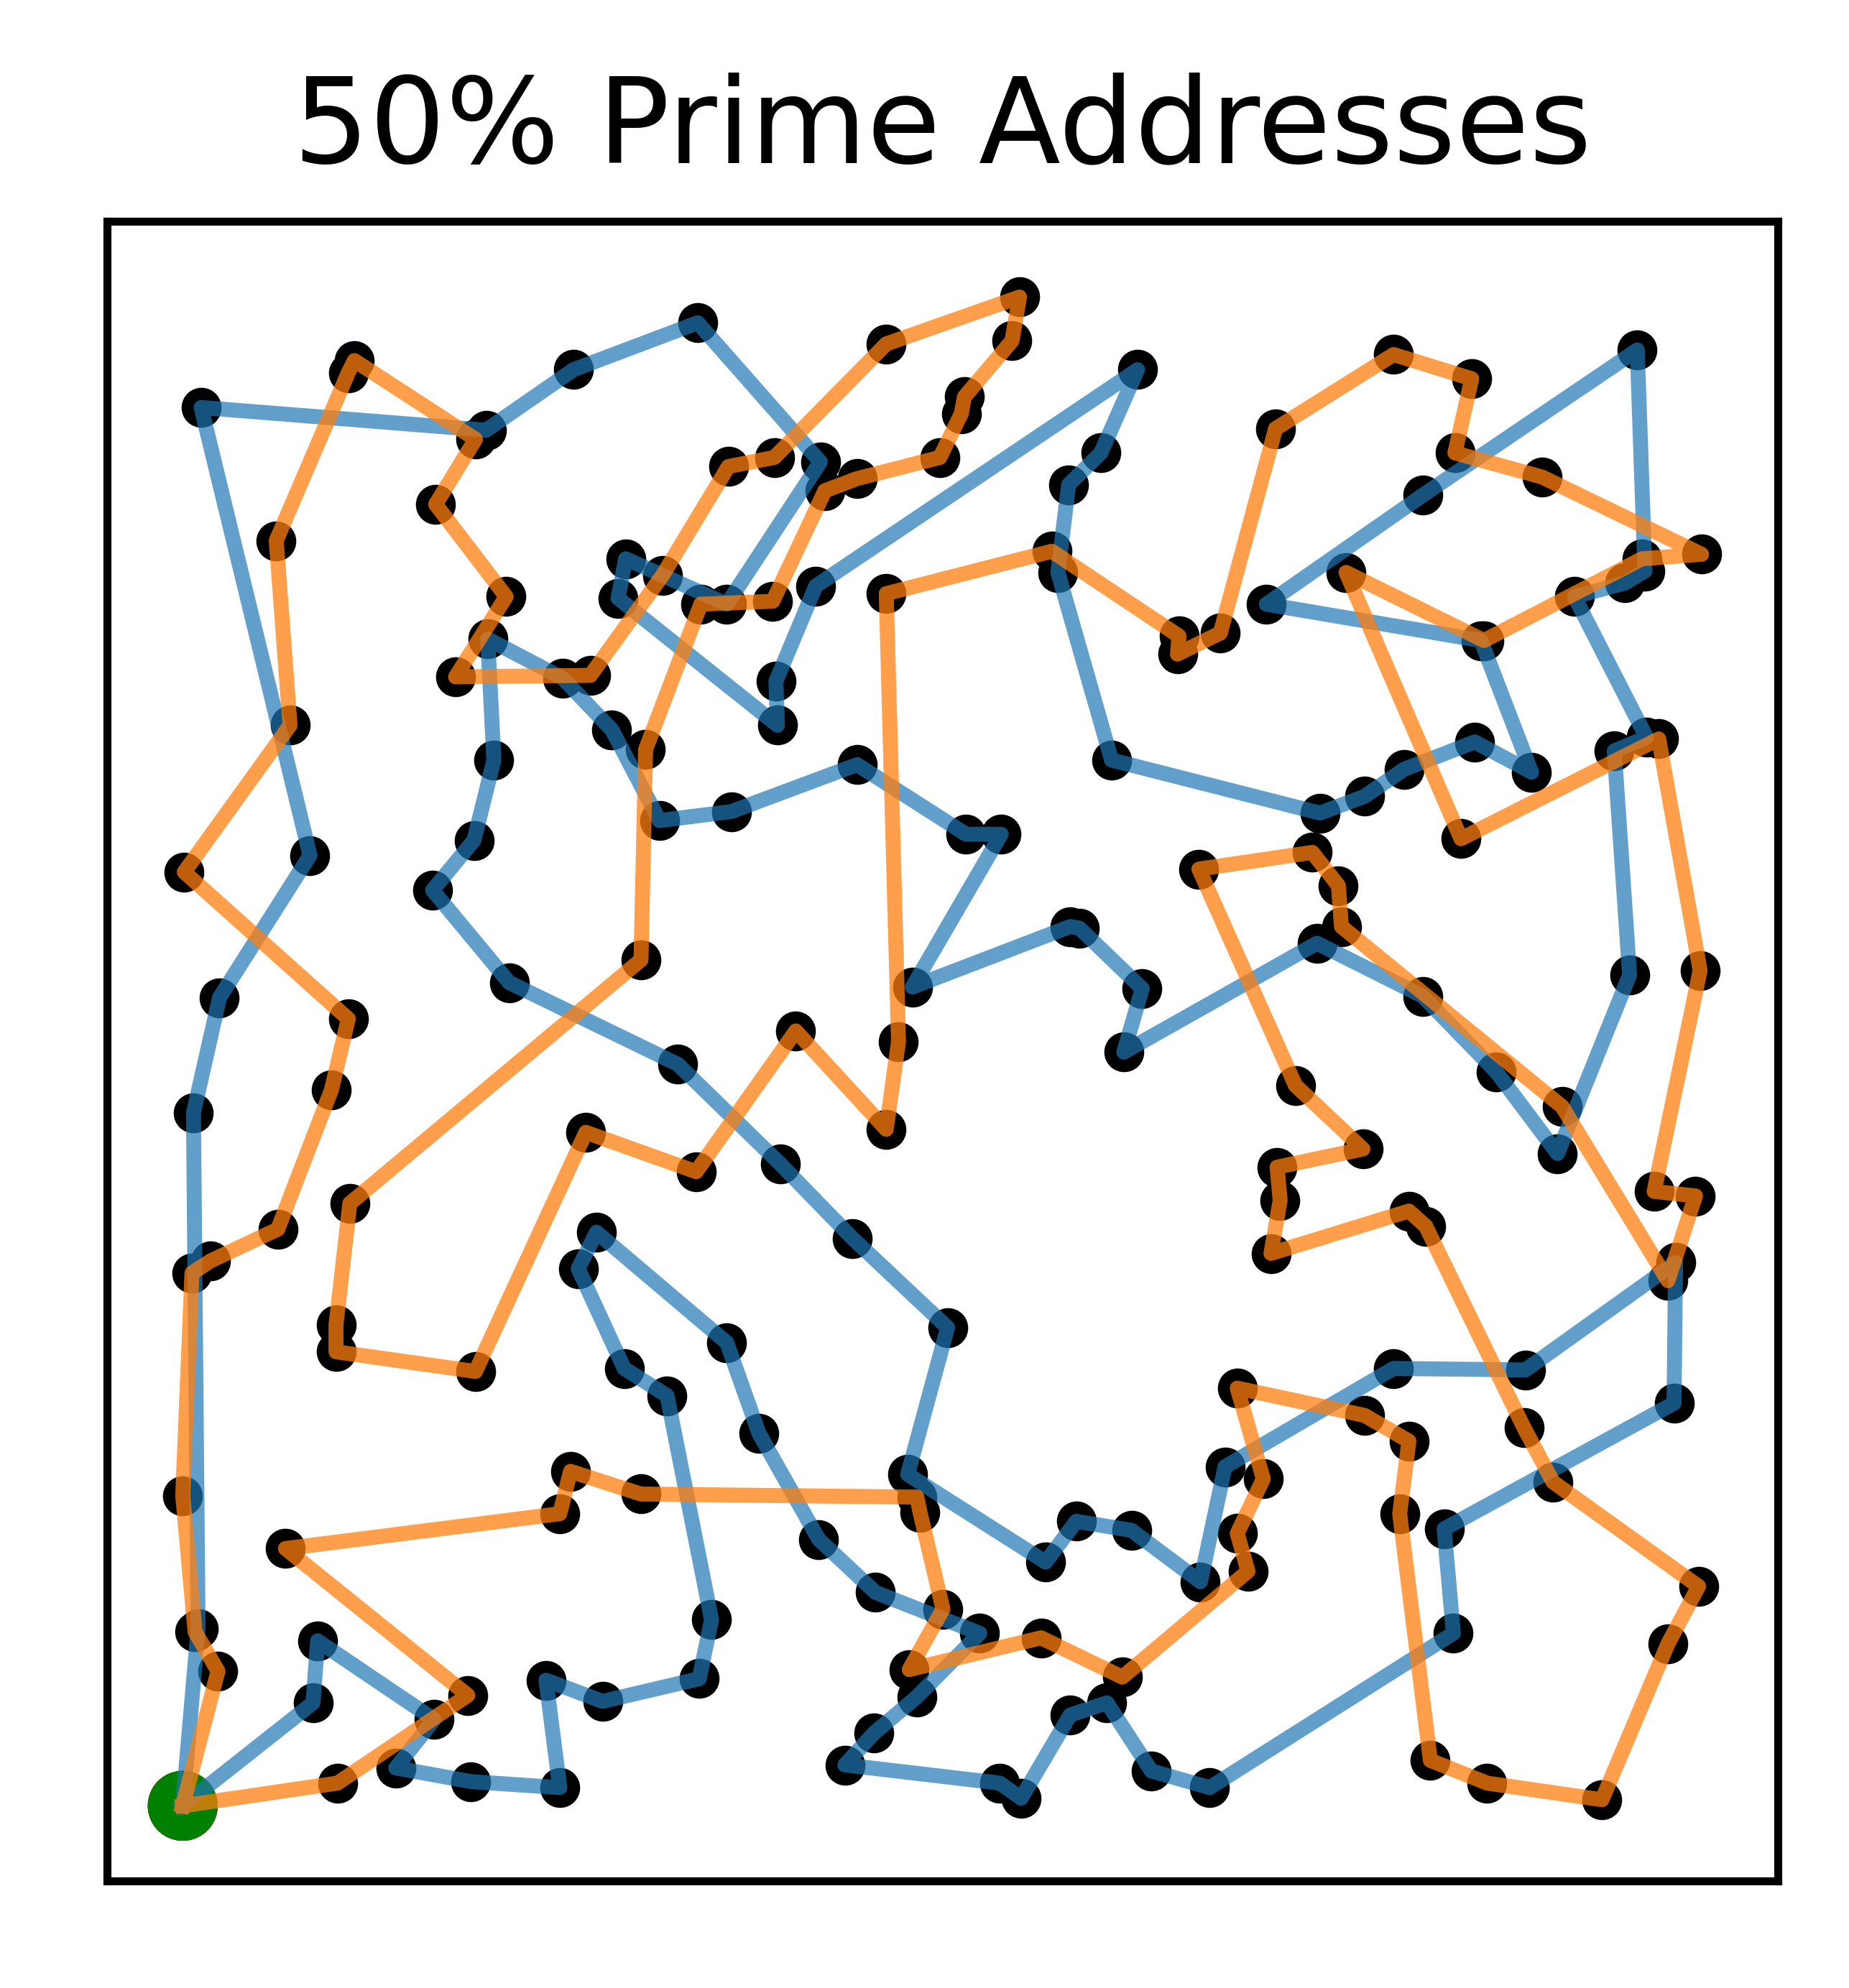

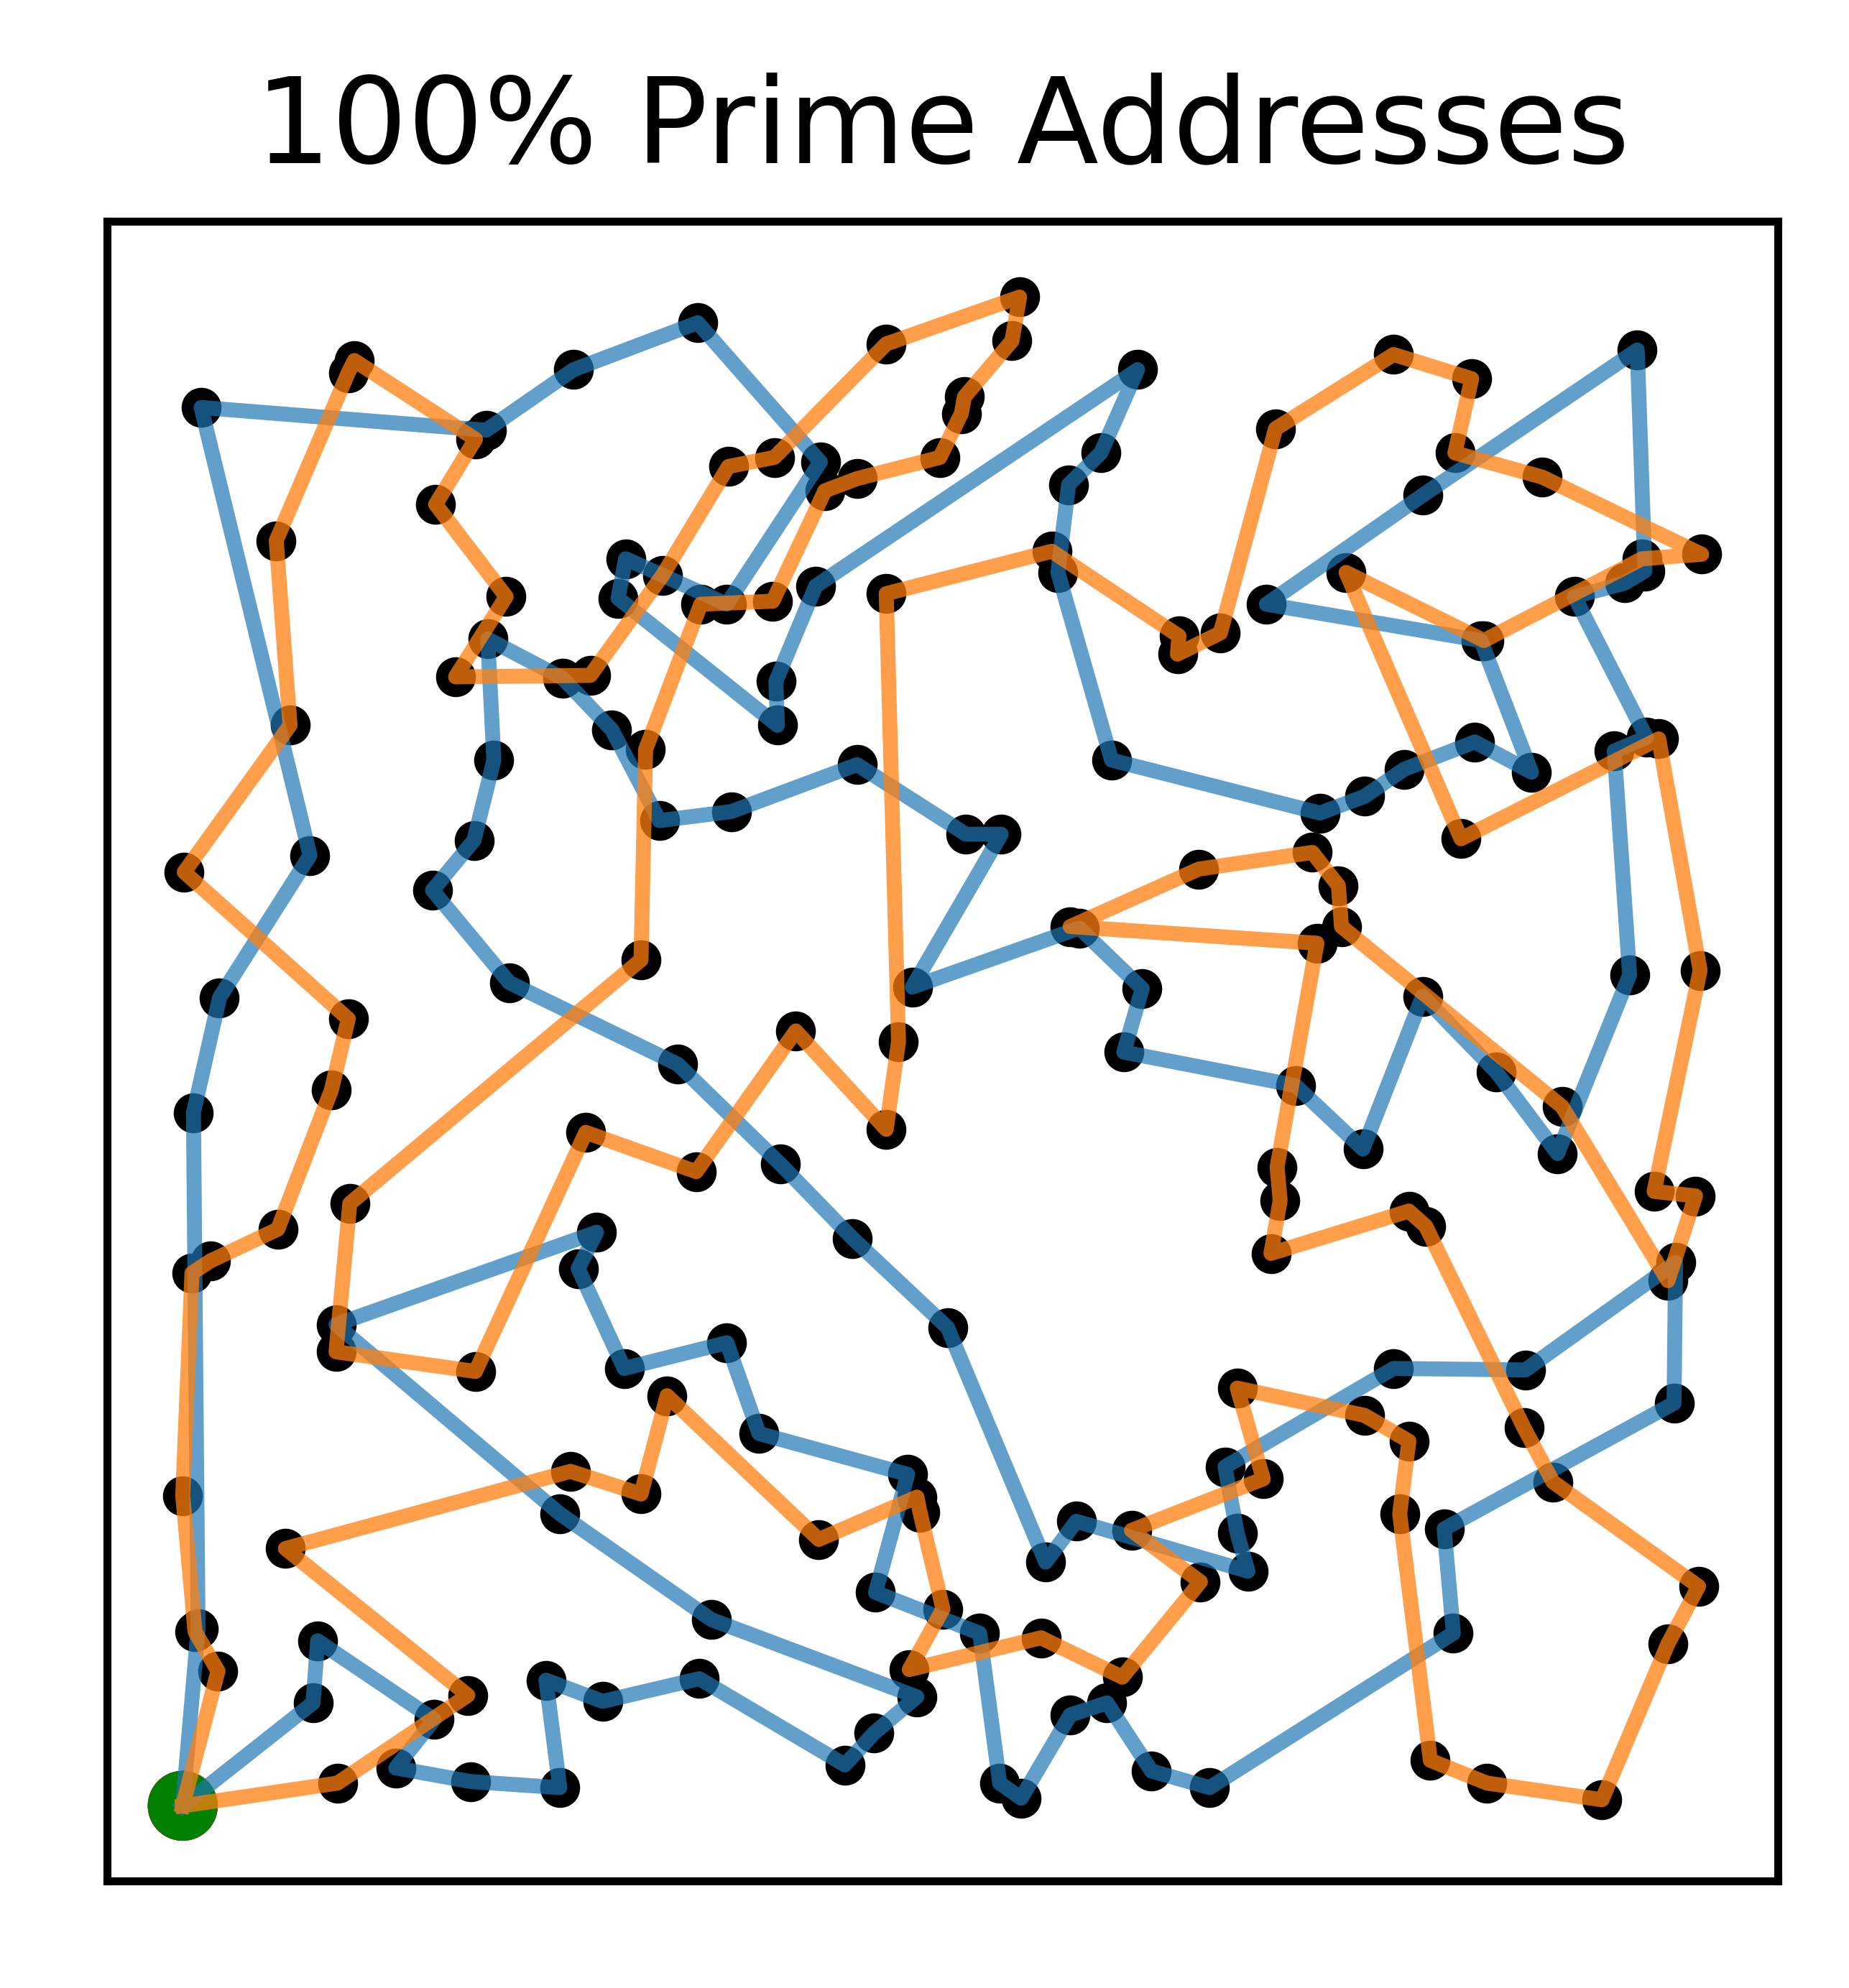

In [11]:
custom_xticks = []
custom_yticks = []

plt.figure(dpi=1000, figsize=[3,3])
display_route('saved_routes/PrimeExperiment/00_percent_PrimeAddresses.mrt')
plt.title('0% Prime Addresses')
plt.xticks(custom_xticks)
plt.yticks(custom_yticks)

plt.figure(dpi=1000, figsize=[3,3])
display_route('saved_routes/PrimeExperiment/20_percent_PrimeAddresses.mrt')
plt.title('20% Prime Addresses')
plt.xticks(custom_xticks)
plt.yticks(custom_yticks)

plt.figure(dpi=1000, figsize=[3,3])
display_route('saved_routes/PrimeExperiment/50_percent_PrimeAddresses.mrt')
plt.title('50% Prime Addresses')
plt.xticks(custom_xticks)
plt.yticks(custom_yticks)

plt.figure(dpi=1000, figsize=[3,3])
display_route('saved_routes/PrimeExperiment/100_percent_PrimeAddresses.mrt')
plt.title('100% Prime Addresses')
plt.xticks(custom_xticks)
plt.yticks(custom_yticks)





Text(0.5, 1.0, 'Effect of Prime Addresses on Multi-Route Optimization')

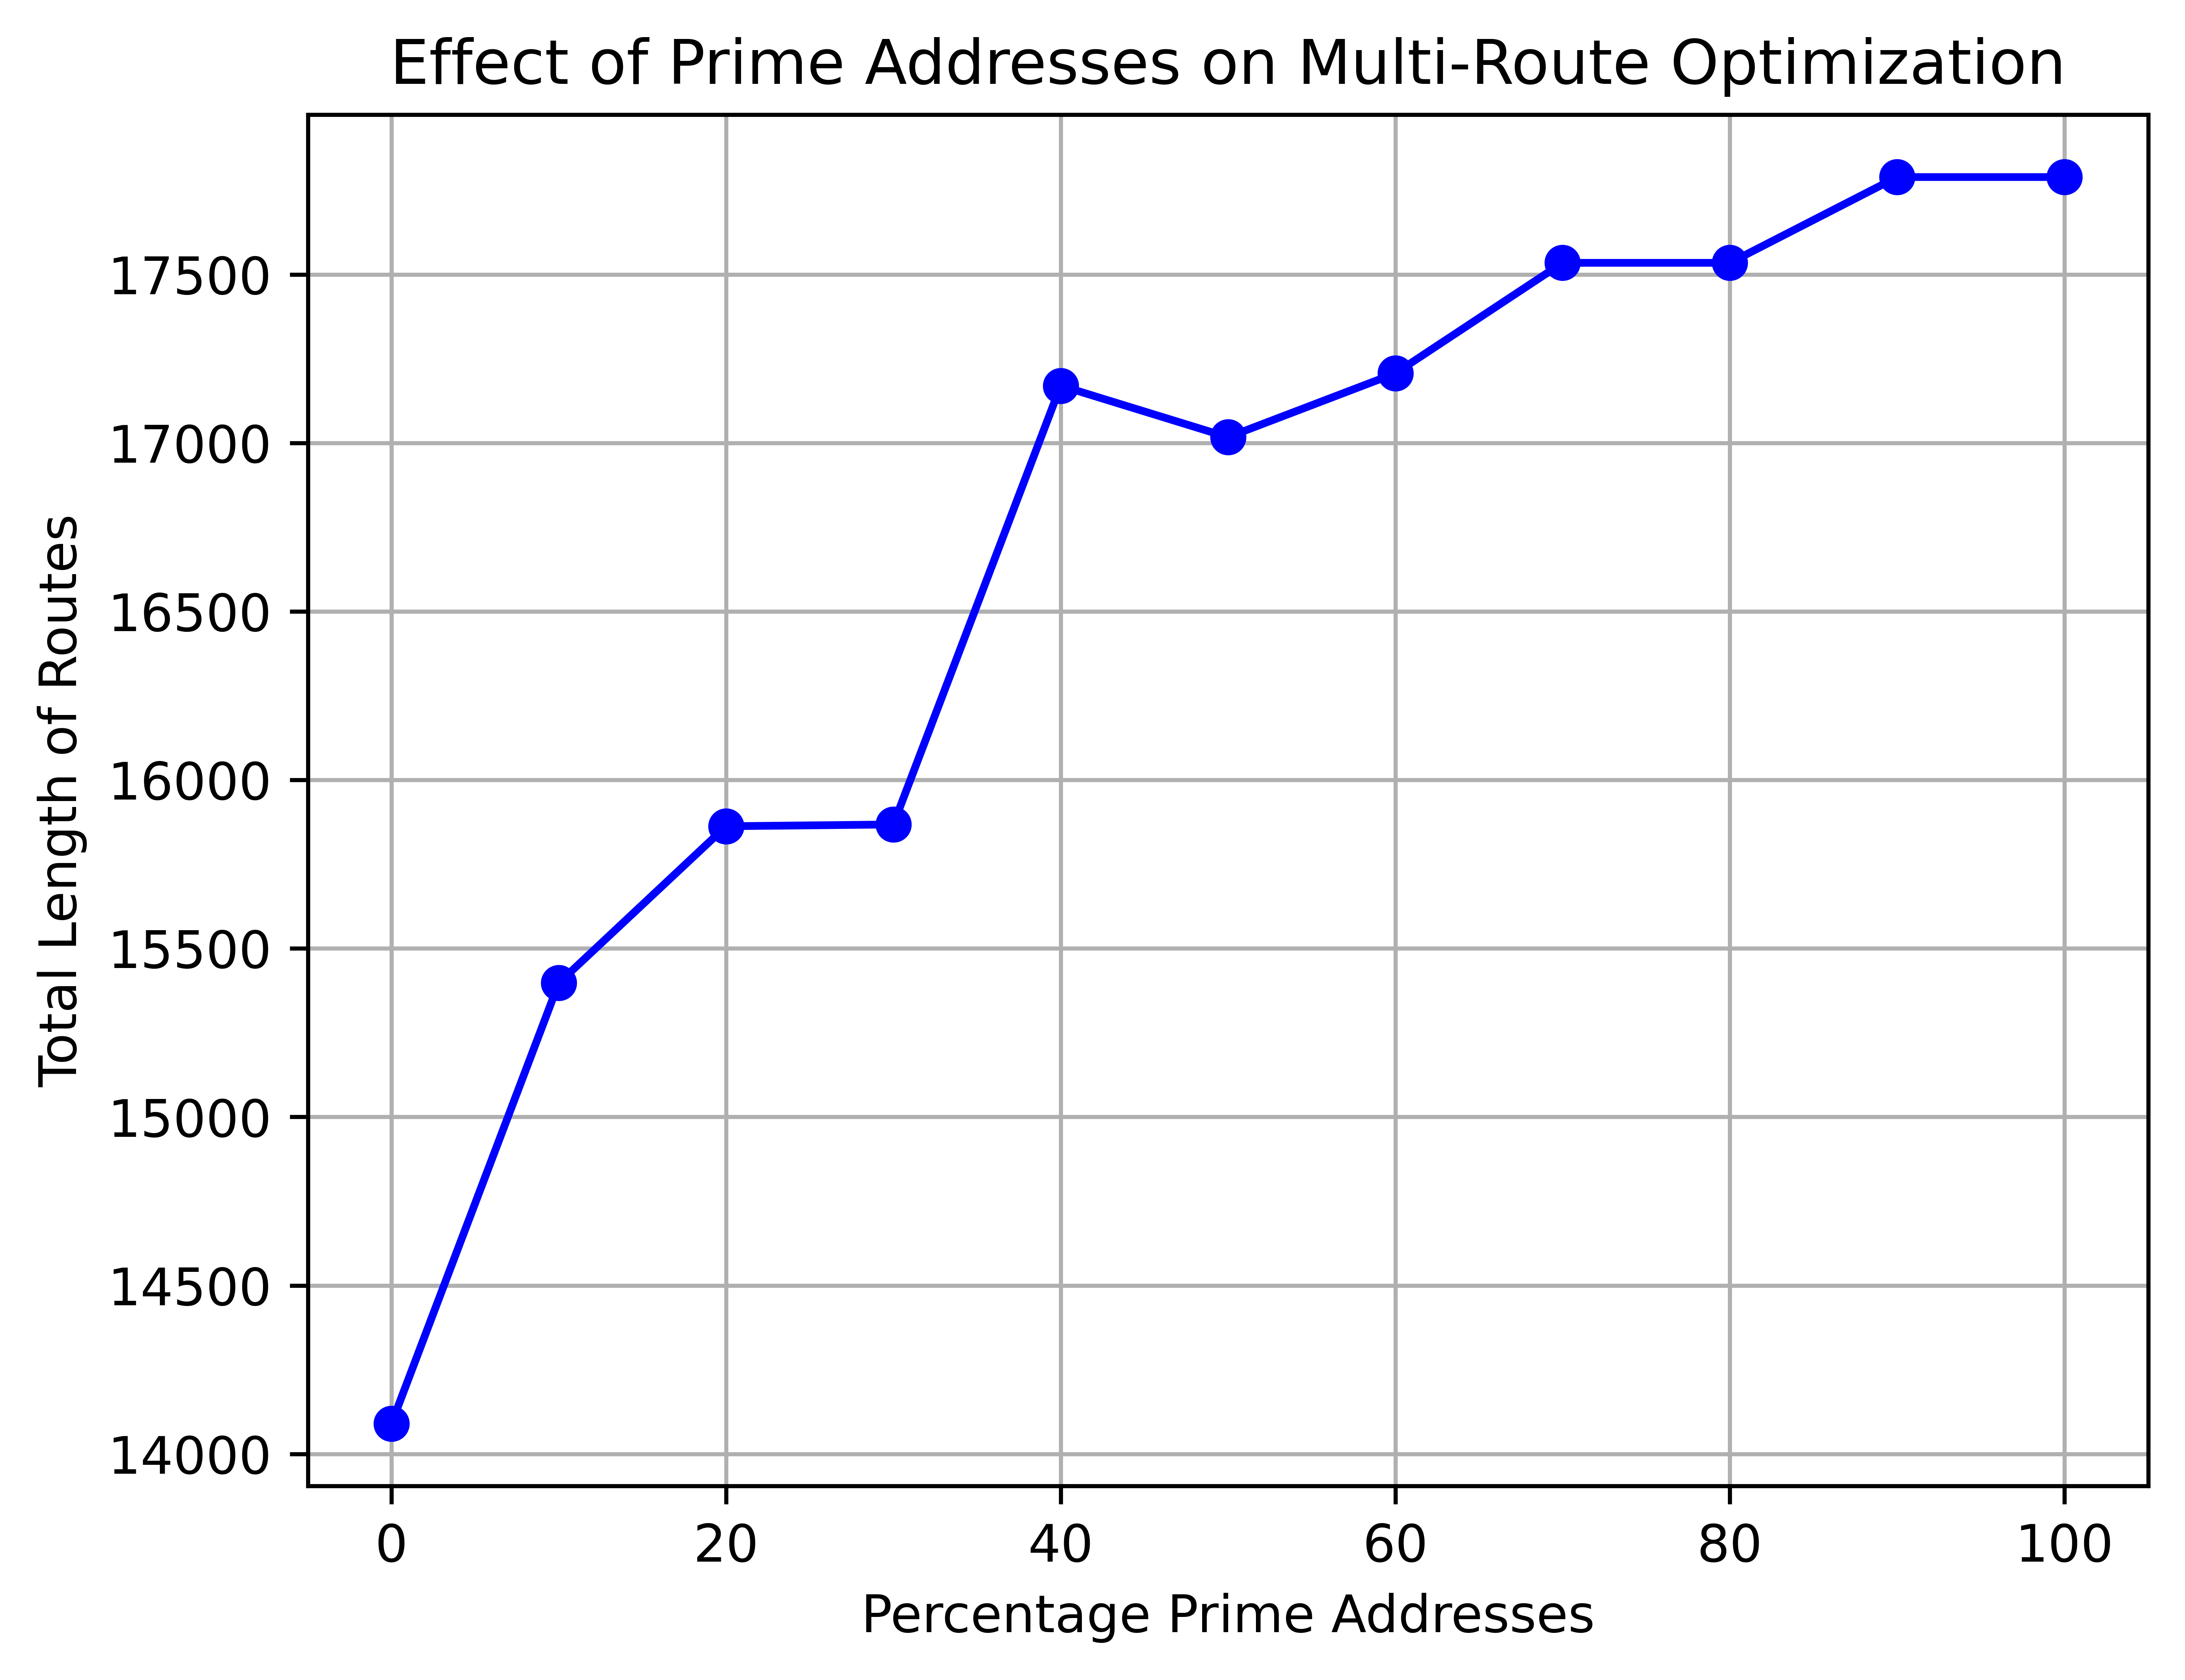

In [12]:
plt.figure(dpi = 1000)

with open('saved_routes/PrimeExperiment/lengths.txt', 'r') as file:
    data_list = [float(line.strip()) for line in file]

x = np.linspace(0,100,11)
y = data_list

plt.plot(x,y, marker = 'o', color = 'blue')
plt.grid(True)
plt.xlabel('Percentage Prime Addresses')
plt.ylabel('Total Length of Routes')
plt.title('Effect of Prime Addresses on Multi-Route Optimization')